<a href="https://colab.research.google.com/github/Vasudeva-bit/Hindi-Character-Detection-on-Scene-Images/blob/main/Project%20on%20detecting%20hindi%20characters%20on%20scene%20images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN Image classification.

Problem solution of A.I India Academia Hackthon. (NVIDIA)
Problem statement:

During the event, participants will be working on a problem of Image classification. The input dataset will consist of images containing Hindi characters. The challenge is to identify the presence of a character in images using Convolutional Neural Networks.

The dataset will contain the following:

Train Dataset: 
Consists of sample reference sets which can be used by participants to train the Convolution Neural Network. The participants are recommended to use their own training dataset if required.

Test Dataset: 
The test dataset will contain the images to be classified and results to be submitted in the form of a JSON file. More details on the JSON format and a sample provided as part of the dataset.
Our evalution aim is to get atleast 85-90% of accuracy.

In [ ]:
# Importing all packages required
import shutil
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
import itertools
import os
import random
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline
from PIL import Image, ImageEnhance

In [ ]:
# Mounting data from google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unziping the dataset
!unzip drive/MyDrive/training.zip > /dev/null

In [ ]:
!unzip drive/MyDrive/test.zip > /dev/null

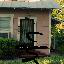

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img = tf.keras.preprocessing.image.load_img('training/hi/door_9_c6_10_none_edgeEnhance.jpg')
img

In [ ]:
train_path = '/content/training'
valid_path = '/content/gdrive/MyDrive/validation'
test_path = '/content'

In [ ]:
# train_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input, rescale = 1./255, validation_split=0.2)
train_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v3.preprocess_input, rescale = 1./255, validation_split=0.2)
train_batchs =  train_datagen.flow_from_directory(directory = train_path, target_size = (64,64),classes = ['background', 'hi'], batch_size = 64, subset = 'training')
# valid_batchs = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
valid_batchs = train_datagen.flow_from_directory(directory = train_path, target_size = (64,64),classes = ['background', 'hi'], batch_size = 64, shuffle = False, subset = 'validation')
# test_batchs = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
#  .flow_from_directory(directory = test_path, classes = ['test'], target_size = (64,64), batch_size = 32, shuffle = False)
# shuffle is false for test in order maintian order so that we can evaluate model using various metrics like confusion matrix and classification report.

Found 4700 images belonging to 2 classes.
Found 1175 images belonging to 2 classes.


In [ ]:
train_batchs.batch_size
valid_batchs.batch_size
images, labels = next(train_batchs)

In [ ]:
def PlotImages(image_arr) :
  fix, axes = plt.subplots(1, 10, figsize = (20, 20))
  axes = axes.flatten()
  for image, ax in zip(image_arr, axes) :
    ax.imshow(image)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

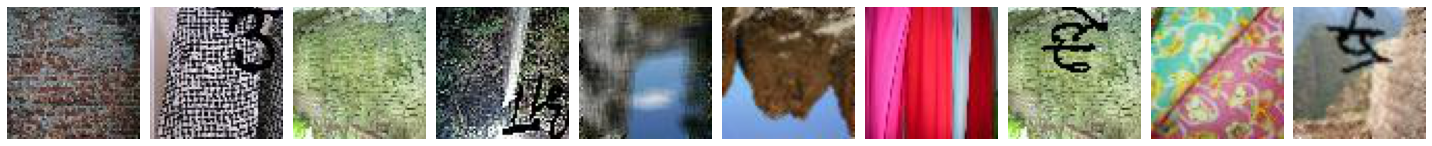

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
PlotImages(images)
print(labels[:10])

In [ ]:
model = Sequential([
                    # Conv2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', padding = 'same', input_shape = (64, 64, 3)), 
                    # MaxPool2D(pool_size = (2, 2), strides = 2),
                    Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'valid', kernel_regularizer=regularizers.l2(0.001), input_shape = (64, 64, 3)), 
                    BatchNormalization(axis=-1),
                    MaxPool2D(pool_size = (2, 2), strides = 2),
                    # Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(0.001) ), 
                    # # BatchNormalization(axis=-1),
                    # MaxPool2D(pool_size = (2, 2), strides = 2), 
                    Dropout(0.2),
                    Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(0.001) ), 
                    BatchNormalization(axis=-1),
                    MaxPool2D(pool_size = (2, 2), strides = 2),  
                    Dropout(0.3),
                    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(0.001) ), 
                    BatchNormalization(axis=-1),
                    MaxPool2D(pool_size = (2, 2), strides = 2),  
                    # new
                    Conv2D(filters = 50, kernel_size = (3, 3), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(0.001) ), 
                    BatchNormalization(axis=-1),
                    MaxPool2D(pool_size = (2, 2), strides = 2),  
                    Dropout(0.4), 
                    # above new
                    Flatten(), 
                    Dense(units = 8, activation = 'relu'),
                    Dense(units = 2, activation = 'softmax'), 
                   ]) 
model.summary()
# one change is same to valid
# image processing to first mobilenet_v2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 8)         32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0

In [ ]:
# Compile the model first
# Accuracy importance is known when we use the validation set along with the train set in fit so metrics is used to my model to understand its level and makes it self better for the test or future predictions
model.compile(optimizer = Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss= 'categorical_crossentropy', metrics = ['accuracy'])
# 1. need to take care of the learning rate as it effects the performance of the model.
model.fit(x = train_batchs, epochs = 8, verbose = 2)
# Since we used tensor flow generator to store image unstructured data of array, it automatically stores the label i.e., answer to image we passed.

Epoch 1/8
74/74 - 5s - loss: 0.6207 - accuracy: 0.7438
Epoch 2/8
74/74 - 2s - loss: 0.4496 - accuracy: 0.8357
Epoch 3/8
74/74 - 2s - loss: 0.3586 - accuracy: 0.8936
Epoch 4/8
74/74 - 2s - loss: 0.3065 - accuracy: 0.9147
Epoch 5/8
74/74 - 2s - loss: 0.2777 - accuracy: 0.9215
Epoch 6/8
74/74 - 2s - loss: 0.2541 - accuracy: 0.9340
Epoch 7/8
74/74 - 2s - loss: 0.2237 - accuracy: 0.9417
Epoch 8/8
74/74 - 2s - loss: 0.2115 - accuracy: 0.9453


In [ ]:
# model.save('/content/model')
# Saving the model
## for importing model
# from tensorflow import keras
# model = keras.models.load_model('path/to/location')
# We shall now use our model to predict on our test data
valid_images, valid_labels = next(valid_batchs) # can change this to test

valid_loss, valid_acc = model.evaluate(valid_batchs, verbose=2)

print('\nTest accuracy:', valid_acc)

19/19 - 1s - loss: 0.2584 - accuracy: 0.9268

Test accuracy: 0.9268085360527039


In [ ]:
model.save('/content/model')

INFO:tensorflow:Assets written to: /content/model/assets
